In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# datetime for dt conversion
from datetime import datetime

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
cities_data_file = "../Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries_list.append(country)


# Print the city count to confirm sufficient count
len(cities)

609

In [5]:
cities

['east london',
 'dikson',
 'arraial do cabo',
 'deputatskiy',
 'bredasdorp',
 'torbay',
 'nikolskoye',
 'dingle',
 'isangel',
 'avarua',
 'palabuhanratu',
 'sao geraldo do araguaia',
 'nizhneyansk',
 'yellowknife',
 'srednekolymsk',
 'kidal',
 'ushuaia',
 'kishi',
 'saint-philippe',
 'albany',
 'marsh harbour',
 'provideniya',
 'shelburne',
 'fallon',
 'qasigiannguit',
 'chapais',
 'tias',
 'tual',
 'le port',
 'lata',
 'busselton',
 'leningradskiy',
 'ribeira grande',
 'fairbanks',
 'chokurdakh',
 'port blair',
 'tuktoyaktuk',
 'adamovka',
 'chauk',
 'wattegama',
 'bambous virieux',
 'luderitz',
 'san jose',
 'punta arenas',
 'mackay',
 'zurrieq',
 'banikoara',
 'zhanaozen',
 'rikitea',
 'saint george',
 'boissevain',
 'vaini',
 'jamestown',
 'luanda',
 'hithadhoo',
 'grand gaube',
 'opunake',
 'bluff',
 'whitehorse',
 'port alfred',
 'whitianga',
 'hobart',
 'temaraia',
 'anloga',
 'constitucion',
 'barawe',
 'victoria',
 'hamilton',
 'louisbourg',
 'airai',
 'puerto ayora',
 'preob

In [6]:
countries_list

['za',
 'ru',
 'br',
 'ru',
 'za',
 'ca',
 'ru',
 'ie',
 'vu',
 'ck',
 'id',
 'br',
 'ru',
 'ca',
 'ru',
 'ml',
 'ar',
 'ng',
 're',
 'au',
 'bs',
 'ru',
 'ca',
 'us',
 'gl',
 'ca',
 'es',
 'id',
 're',
 'sb',
 'au',
 'ru',
 'pt',
 'us',
 'ru',
 'in',
 'ca',
 'ru',
 'mm',
 'lk',
 'mu',
 'na',
 'ph',
 'cl',
 'au',
 'mt',
 'bj',
 'kz',
 'pf',
 'bm',
 'ca',
 'to',
 'sh',
 'ao',
 'mv',
 'mu',
 'nz',
 'nz',
 'ca',
 'za',
 'nz',
 'au',
 'ki',
 'gh',
 'mx',
 'so',
 'sc',
 'bm',
 'ca',
 'pw',
 'ec',
 'ru',
 'na',
 'gl',
 'br',
 'ca',
 'om',
 'pg',
 'gl',
 'mz',
 'br',
 'us',
 'is',
 'br',
 'pf',
 'gl',
 'us',
 'uy',
 'br',
 'us',
 'cl',
 'tr',
 'za',
 'ru',
 'cn',
 'se',
 'br',
 'us',
 'br',
 'ec',
 'mg',
 'id',
 'mu',
 'so',
 'ru',
 'et',
 'ly',
 'pf',
 'nc',
 'cv',
 'mu',
 'gl',
 'ca',
 'br',
 'mx',
 'in',
 'us',
 'ru',
 'cl',
 'pf',
 'sj',
 'bb',
 'ph',
 'br',
 'us',
 'mx',
 'cl',
 'ru',
 'cl',
 'ca',
 'et',
 'au',
 'ru',
 'ca',
 'ar',
 'mg',
 'kz',
 'za',
 'ru',
 'sl',
 'tv',
 'pe',
 'pt',

In [7]:
# Combine the two lists into a list of tuples using the zip function
city_country = zip(cities,countries_list)        
        
list(city_country)

[('east london', 'za'),
 ('dikson', 'ru'),
 ('arraial do cabo', 'br'),
 ('deputatskiy', 'ru'),
 ('bredasdorp', 'za'),
 ('torbay', 'ca'),
 ('nikolskoye', 'ru'),
 ('dingle', 'ie'),
 ('isangel', 'vu'),
 ('avarua', 'ck'),
 ('palabuhanratu', 'id'),
 ('sao geraldo do araguaia', 'br'),
 ('nizhneyansk', 'ru'),
 ('yellowknife', 'ca'),
 ('srednekolymsk', 'ru'),
 ('kidal', 'ml'),
 ('ushuaia', 'ar'),
 ('kishi', 'ng'),
 ('saint-philippe', 're'),
 ('albany', 'au'),
 ('marsh harbour', 'bs'),
 ('provideniya', 'ru'),
 ('shelburne', 'ca'),
 ('fallon', 'us'),
 ('qasigiannguit', 'gl'),
 ('chapais', 'ca'),
 ('tias', 'es'),
 ('tual', 'id'),
 ('le port', 're'),
 ('lata', 'sb'),
 ('busselton', 'au'),
 ('leningradskiy', 'ru'),
 ('ribeira grande', 'pt'),
 ('fairbanks', 'us'),
 ('chokurdakh', 'ru'),
 ('port blair', 'in'),
 ('tuktoyaktuk', 'ca'),
 ('adamovka', 'ru'),
 ('chauk', 'mm'),
 ('wattegama', 'lk'),
 ('bambous virieux', 'mu'),
 ('luderitz', 'na'),
 ('san jose', 'ph'),
 ('punta arenas', 'cl'),
 ('mackay', '

In [8]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_key}&units={units}&q="

# See what the links lay out looks like
city_url_test = f"{url}appid={weather_key}&units={units}&q=mataura"
city_country_url_test = f"{url}appid={weather_key}&units={units}&q=jamestown"
city_country_url_test = f"{url}appid={weather_key}&units={units}&q=tumbes,pe"

# print(city_country_url_test)



In [9]:
# Open file to write results of API calls - success or not into a txt file, as well as all data pulled into a csv
success_city_list = open('weatherAPI_printlog.txt', 'w')
city_data_outcome = open('weatherAPI_data.csv', 'w')

In [10]:

# set up lists to hold reponse info
# in ['coord']
lon = []
lat = []
# in ['weather']
weather_id = []
main_weather = []
weather_description = []
weather_icon = []
# in ['base']
base_base = []
# in ['main]
main_temp = []
main_feels_like = []
main_temp_min = []
main_temp_max = []
main_pressure = []
main_humidity = []
# in ['visibility']
visibility_visibility = []
# in ['wind']
wind_speed = []
wind_deg = []
# in ['clouds']
clouds_all = []
# in ['dt']
dt_weather_data = []
# in ['sys']
sys_type = []
sys_id = []
sys_country = []
sys_sunrise = []
sys_sunset = []
# in ['timezone']
timezone_timezone = []
# in ['id']
city_id = []
# in ['name']
city_name = []
# in ['cod']
cod_cod = []

number = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()

    # to get the number of city in for loop
    number.append(city)
    number_of_city = len(number)
    try:
        # first dict
        lon.append(response['coord']['lon'])
        lon_only = response['coord']['lon']
        lat.append(response['coord']['lat'])
        lat_only = response['coord']['lat']


        # second dict
        # weather_id.append(response['weather'][0]['id'])
        # main_weather.append(response['weather'][0]['main'])
        # weather_description.append(response['weather'][0]['description'])
        # weather_icon.append(response['weather'][0]['icon'])

        # third dict
        # base_base.append(response['base'])

        # fourth dict
        main_temp.append(response['main']['temp'])
        main_temp_only = response['main']['temp']
        # main_feels_like.append(response['main']['feels_like'])
        main_temp_min.append(response['main']['temp_min'])
        main_temp_min_only = response['main']['temp_min']
        main_temp_max.append(response['main']['temp_max'])
        main_temp_max_only = response['main']['temp_max']
        # main_pressure.append(response['main']['pressure'])
        main_humidity.append(response['main']['humidity'])
        main_humidity_only = response['main']['humidity']

        # fifth dict
        # visibility_visibility.append(response['visibility'])

        # sixth dict
        wind_speed.append(response['wind']['speed'])
        wind_speed_only = response['wind']['speed']
        # wind_deg.append(response['wind']['deg'])

        # seventh dict
        clouds_all.append(response['clouds']['all'])
        clouds_all_only = response['clouds']['all']
        # eight dict
        dt_weather_date = (datetime.fromtimestamp(response['dt'])).strftime('%m/%d/%y')
        dt_weather_data.append(dt_weather_date)

        # ninth dict
        # sys_type.append(response['sys']['type'])
        # sys_id.append(response['sys']['id'])
        sys_country.append(response['sys']['country'])
        sys_country_only = response['sys']['country']
        # sys_sunrise.append(response['sys']['sunrise'])
        # sys_sunset.append(response['sys']['sunset'])

        # tenth dict
        # timezone_timezone.append(response['timezone'])

        # eleventh dict
        city_id.append(response['id'])
        city_id_only = int(response['id'])

        # twelveth dict
        city_name.append(response['name'])
        city_name_only = response['name']

        # thirteen dict
        # cod_cod.append(response['cod'])
        
        
            # Output line to terminal to mark progress and store it to a print log text file
        print(f"{number_of_city}. {city_name_only} with city ID:{city_id_only} was found in the Weathermap API\n")
        success_city_list.write(f"Success found: {city_name_only}  City ID:{city_id_only} \n")
        
        # Output all retreived values to a csv file

        city_data_outcome.write(f"The outcome data of {city_name_only}, {sys_country_only}: Lat & Lon --> {lat_only},{lon_only} Weather Date --> {dt_weather_date} Weather --> Temperature, Max Temp and Min Temp: {main_temp_only} & {main_temp_max_only} & {main_temp_min_only} Humidity: {main_humidity_only} Clouds: {clouds_all_only} Wind Speed: {wind_speed_only}\n")
        # city_data_outcome.write(f"{city_id},{city_name},{sys_country},{lat},{lon},{dt_weather_date},\
        #     {temperature},{humidity_val},{cloudiness_val},{windSpeed}\n")


    # Handle exceptions for a character that is not available 
    except:
        success_city_list.write(f"{number_of_city}. {city} was not found. \n")
        print(" - " * 10)
        print(f"{number_of_city}. {city} was not found" )
        print(" - " * 10)

        # Append null values so lists are all the same length (later we will remove nulls from dataframe)
        city_id.append(None)
        city_name.append(None)
        sys_country.append(None)
        lat.append(None)
        lon.append(None)
        dt_weather_data.append(None)
        main_temp.append(None)
        main_temp_max.append(None)
        main_temp_min.append(None)
        main_humidity.append(None)
        clouds_all.append(None)
        wind_speed.append(None)
        #keep code going
        pass


# After getting data in a for loop... we want to make sure our text file's do not change... basically convert our text files to raw data
success_city_list.close()
city_data_outcome.close()


1. East London with city ID:1006984 was found in the Weathermap API

2. Dikson with city ID:1507390 was found in the Weathermap API

3. Arraial do Cabo with city ID:3471451 was found in the Weathermap API

4. Deputatsky with city ID:2028164 was found in the Weathermap API

5. Bredasdorp with city ID:1015776 was found in the Weathermap API

6. Torbay with city ID:6167817 was found in the Weathermap API

7. Nikolskoye with city ID:546105 was found in the Weathermap API

8. Dingle with city ID:1714733 was found in the Weathermap API

9. Isangel with city ID:2136825 was found in the Weathermap API

10. Avarua with city ID:4035715 was found in the Weathermap API

 -  -  -  -  -  -  -  -  -  - 
11. palabuhanratu was not found
 -  -  -  -  -  -  -  -  -  - 
12. São Geraldo do Araguaia with city ID:3388760 was found in the Weathermap API

 -  -  -  -  -  -  -  -  -  - 
13. nizhneyansk was not found
 -  -  -  -  -  -  -  -  -  - 
14. Yellowknife with city ID:6185377 was found in the Weathermap 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# create a dictionary from the lists that we created above
weather_table_dict = {
    "city_id": city_id,
    "city_name": city_name,
    "country": sys_country,
    "latitude": lat,
    "longitude": lon,
    "weather_date": dt_weather_date,
    "temp": main_temp,
    "temp max": main_temp_max,
    "temp min": main_temp_min, 
    "humidity": main_humidity,
    "cloudiness": clouds_all,
    "wind_speed": wind_speed
}

weather_data = pd.DataFrame(weather_table_dict)
weather_data.head()

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,1006984.0,East London,ZA,-33.0153,27.9116,11/13/21,18.79,18.79,18.79,72.0,99.0,6.02
1,1507390.0,Dikson,RU,73.5069,80.5464,11/13/21,-23.18,-23.18,-23.18,96.0,13.0,1.27
2,3471451.0,Arraial do Cabo,BR,-22.9661,-42.0278,11/13/21,20.30,20.30,20.30,59.0,73.0,5.08
3,2028164.0,Deputatsky,RU,69.3000,139.9000,11/13/21,-22.91,-22.91,-22.91,100.0,100.0,0.74
4,1015776.0,Bredasdorp,ZA,-34.5322,20.0403,11/13/21,13.49,13.49,13.49,88.0,52.0,1.12


In [12]:
weather_data.count()

city_id         565
city_name       565
country         565
latitude        565
longitude       565
weather_date    625
temp            565
temp max        565
temp min        565
humidity        565
cloudiness      565
wind_speed      565
dtype: int64

In [13]:
# From the table, we have some values that are not wanted... since we did ----.append(None) to create fake values if it had a missing column
weather_data_clean = weather_data.dropna()
weather_data_clean.count()


city_id         565
city_name       565
country         565
latitude        565
longitude       565
weather_date    565
temp            565
temp max        565
temp min        565
humidity        565
cloudiness      565
wind_speed      565
dtype: int64

In [16]:
weather_data_clean

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,1006984.0,East London,ZA,-33.0153,27.9116,11/13/21,18.79,18.79,18.79,72.0,99.0,6.02
1,1507390.0,Dikson,RU,73.5069,80.5464,11/13/21,-23.18,-23.18,-23.18,96.0,13.0,1.27
2,3471451.0,Arraial do Cabo,BR,-22.9661,-42.0278,11/13/21,20.30,20.30,20.30,59.0,73.0,5.08
3,2028164.0,Deputatsky,RU,69.3000,139.9000,11/13/21,-22.91,-22.91,-22.91,100.0,100.0,0.74
4,1015776.0,Bredasdorp,ZA,-34.5322,20.0403,11/13/21,13.49,13.49,13.49,88.0,52.0,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...
620,155321.0,Magomeni,TZ,-6.8000,39.2500,11/13/21,25.61,25.61,25.61,83.0,49.0,2.99
621,2388873.0,Bimbo,CF,4.2567,18.4158,11/13/21,22.08,22.08,22.08,96.0,92.0,0.96
622,3422683.0,Kangaatsiaq,GL,68.3065,-53.4641,11/13/21,-12.50,-12.50,-12.50,87.0,25.0,3.66
623,1808744.0,Hede,CN,33.7681,120.2517,11/13/21,7.60,7.60,7.60,70.0,0.0,2.92


In [17]:
# reset index since we took out some unwanted data... make sure we reset index and drop those are not needed
weather_data_clean = weather_data_clean.reset_index(drop=True)
weather_data_clean

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,1006984.0,East London,ZA,-33.0153,27.9116,11/13/21,18.79,18.79,18.79,72.0,99.0,6.02
1,1507390.0,Dikson,RU,73.5069,80.5464,11/13/21,-23.18,-23.18,-23.18,96.0,13.0,1.27
2,3471451.0,Arraial do Cabo,BR,-22.9661,-42.0278,11/13/21,20.30,20.30,20.30,59.0,73.0,5.08
3,2028164.0,Deputatsky,RU,69.3000,139.9000,11/13/21,-22.91,-22.91,-22.91,100.0,100.0,0.74
4,1015776.0,Bredasdorp,ZA,-34.5322,20.0403,11/13/21,13.49,13.49,13.49,88.0,52.0,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...
560,155321.0,Magomeni,TZ,-6.8000,39.2500,11/13/21,25.61,25.61,25.61,83.0,49.0,2.99
561,2388873.0,Bimbo,CF,4.2567,18.4158,11/13/21,22.08,22.08,22.08,96.0,92.0,0.96
562,3422683.0,Kangaatsiaq,GL,68.3065,-53.4641,11/13/21,-12.50,-12.50,-12.50,87.0,25.0,3.66
563,1808744.0,Hede,CN,33.7681,120.2517,11/13/21,7.60,7.60,7.60,70.0,0.0,2.92


In [26]:
# Make sure all columns are integers or floats that hold numbers
print(weather_data_clean['city_id'])
print("")
print(weather_data_clean['latitude'])
print("")
print(weather_data_clean['longitude'])
print("")
print(weather_data_clean['temp'])
print("")
print(weather_data_clean['humidity'])
print("")
print(weather_data_clean['temp min'])
print("")
print(weather_data_clean['cloudiness'])
print("")
print(weather_data_clean['wind_speed'])
print("")

# all of the values are floats... in an article, integers are better to work with for plotting... 
# https://www.dummies.com/programming/c/the-real-difference-between-integers-and-floating-point-values/#:~:text=The%20bottom%20line%20is%20that%20it%20takes%20more,values%3B%20use%20the%20floating-point%20numbers%20only%20when%20necessary.


0      1006984.0
1      1507390.0
2      3471451.0
3      2028164.0
4      1015776.0
         ...    
560     155321.0
561    2388873.0
562    3422683.0
563    1808744.0
564    3980844.0
Name: city_id, Length: 565, dtype: float64

0     -33.0153
1      73.5069
2     -22.9661
3      69.3000
4     -34.5322
        ...   
560    -6.8000
561     4.2567
562    68.3065
563    33.7681
564    19.5500
Name: latitude, Length: 565, dtype: float64

0       27.9116
1       80.5464
2      -42.0278
3      139.9000
4       20.0403
         ...   
560     39.2500
561     18.4158
562    -53.4641
563    120.2517
564   -103.4000
Name: longitude, Length: 565, dtype: float64

0      18.79
1     -23.18
2      20.30
3     -22.91
4      13.49
       ...  
560    25.61
561    22.08
562   -12.50
563     7.60
564    26.87
Name: temp, Length: 565, dtype: float64

0       72.0
1       96.0
2       59.0
3      100.0
4       88.0
       ...  
560     83.0
561     96.0
562     87.0
563     70.0
564     34.0
Name: humi

In [27]:
# convert columns into integers that do not need decimals such as city_id
weather_data_clean['city_id'] = weather_data_clean['city_id'].astype(int)
print(weather_data_clean['city_id'])

0      1006984
1      1507390
2      3471451
3      2028164
4      1015776
        ...   
560     155321
561    2388873
562    3422683
563    1808744
564    3980844
Name: city_id, Length: 565, dtype: int32


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Blank vs Blank Plots

### City Latitude vs Temperature

In [29]:
weather_Date_col = weather_data_clean['weather_date'][0]
weather_Date_col

'11/13/21'

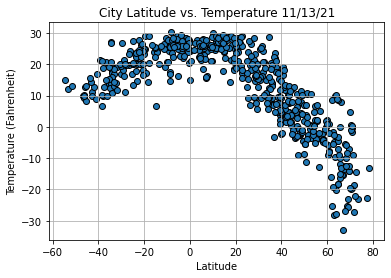

In [30]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]
plt.scatter(weather_data_clean["latitude"], weather_data_clean["temp"], marker="o",edgecolors='black')

# Graph
#title 
plt.title(f"City Latitude vs. Temperature {weather_Date_col}")

# x label
plt.xlabel("Latitude")

# y label
plt.ylabel("Temperature (Fahrenheit)")

# Show lines of the chart...
plt.grid(True)

# Save the figure
plt.savefig("../Images/Latitude_Vs_Temperature.png")

# Show plot
plt.show()

### City Latitude vs Humidity

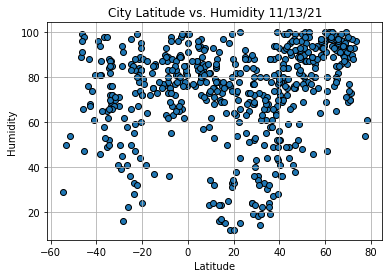

In [31]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# plot a scatter chart... with 'latitude' as x value and 'humidity' as y value
plt.scatter(weather_data_clean["latitude"], weather_data_clean["humidity"], marker="o",edgecolors='black')

# Graph
#title 
plt.title(f"City Latitude vs. Humidity {weather_Date_col}")

# x label
plt.xlabel("Latitude")

# y label
plt.ylabel("Humidity")

# Show lines of the chart...
plt.grid(True)

# Save the figure
plt.savefig("../Images/Latitude_Vs_Humidity.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness Plot

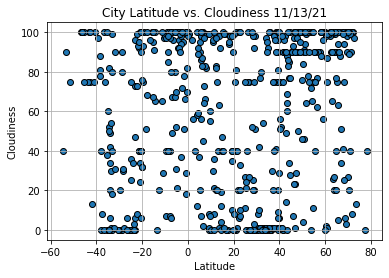

In [32]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# plot a scatter chart... with 'latitude' as x value and 'cloudiness' as y value
plt.scatter(weather_data_clean["latitude"], weather_data_clean["cloudiness"], marker="o",edgecolors='black')

# Graph
#title 
plt.title(f"City Latitude vs. Cloudiness {weather_Date_col}")

# x label
plt.xlabel("Latitude")

# y label
plt.ylabel("Cloudiness")

# Show lines of the chart...
plt.grid(True)

# Save the figure
plt.savefig("../Images/Latitude_Vs_Cloudiness.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

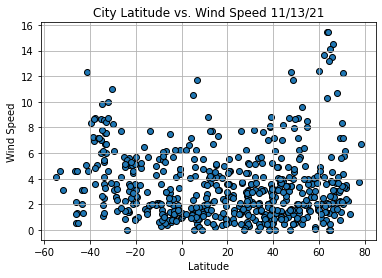

In [33]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# plot a scatter chart... with 'latitude' as x value and 'wind_speed' as y value
plt.scatter(weather_data_clean["latitude"], weather_data_clean["wind_speed"], marker="o",edgecolors='black')

# Graph
#title 
plt.title(f"City Latitude vs. Wind Speed {weather_Date_col}")

# x label
plt.xlabel("Latitude")

# y label
plt.ylabel("Wind Speed")

# Show lines of the chart...
plt.grid(True)

# Save the figure
plt.savefig("../Images/Latitude_Vs_Wind_Speed.png")

# Show plot
plt.show()

## Linear Regression

### Northern and Southern DataFrames

#### Northern Data Frame

In [37]:
weather_data_clean

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,1006984,East London,ZA,-33.0153,27.9116,11/13/21,18.79,18.79,18.79,72.0,99.0,6.02
1,1507390,Dikson,RU,73.5069,80.5464,11/13/21,-23.18,-23.18,-23.18,96.0,13.0,1.27
2,3471451,Arraial do Cabo,BR,-22.9661,-42.0278,11/13/21,20.30,20.30,20.30,59.0,73.0,5.08
3,2028164,Deputatsky,RU,69.3000,139.9000,11/13/21,-22.91,-22.91,-22.91,100.0,100.0,0.74
4,1015776,Bredasdorp,ZA,-34.5322,20.0403,11/13/21,13.49,13.49,13.49,88.0,52.0,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...
560,155321,Magomeni,TZ,-6.8000,39.2500,11/13/21,25.61,25.61,25.61,83.0,49.0,2.99
561,2388873,Bimbo,CF,4.2567,18.4158,11/13/21,22.08,22.08,22.08,96.0,92.0,0.96
562,3422683,Kangaatsiaq,GL,68.3065,-53.4641,11/13/21,-12.50,-12.50,-12.50,87.0,25.0,3.66
563,1808744,Hede,CN,33.7681,120.2517,11/13/21,7.60,7.60,7.60,70.0,0.0,2.92


In [42]:
# By this code... it will only take the column of 'wind_speed' and tell us what values equals or over 1. 
# false = less than one 
# true = more than one or equals
wind_speed_over_1 = weather_data_clean.wind_speed >= 1
print(wind_speed_over_1)

0       True
1       True
2       True
3      False
4       True
       ...  
560     True
561    False
562     True
563     True
564     True
Name: wind_speed, Length: 565, dtype: bool


In [54]:
# Apply the code from above for the northern hemisphere... According to the longitude, anything above or equals to 0 is considered NORTH
# If less than 0, it is conisdered SOUTH
northern_hemisphere = weather_data_clean.longitude >= 0
print(f"{northern_hemisphere}\n")
print("-" * 20)

# From above, we have a boolean of values... boolean is true or false... 
# We need to read the data that is only true 
northern_data = weather_data_clean[northern_hemisphere]
print(f"{northern_data}\n")
print("-" * 20)

# Now we weed to reset the index... since its index is off since the print tells us that its size is '[331 rows x 12 columns]'
northern_data = northern_data.reset_index(drop=True)

0       True
1       True
2      False
3       True
4       True
       ...  
560     True
561     True
562    False
563     True
564    False
Name: longitude, Length: 565, dtype: bool

--------------------
     city_id    city_name country  latitude  longitude weather_date   temp  \
0    1006984  East London      ZA  -33.0153    27.9116     11/13/21  18.79   
1    1507390       Dikson      RU   73.5069    80.5464     11/13/21 -23.18   
3    2028164   Deputatsky      RU   69.3000   139.9000     11/13/21 -22.91   
4    1015776   Bredasdorp      ZA  -34.5322    20.0403     11/13/21  13.49   
6     546105   Nikolskoye      RU   59.7035    30.7861     11/13/21   2.23   
..       ...          ...     ...       ...        ...          ...    ...   
558  2022773     Khandyga      RU   62.6667   135.6000     11/13/21 -19.07   
559  1261205    Nongstoin      IN   25.5167    91.2667     11/13/21   9.33   
560   155321     Magomeni      TZ   -6.8000    39.2500     11/13/21  25.61   
561  2388873 

In [55]:
# Main clean northern data
northern_data

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,1006984,East London,ZA,-33.0153,27.9116,11/13/21,18.79,18.79,18.79,72.0,99.0,6.02
1,1507390,Dikson,RU,73.5069,80.5464,11/13/21,-23.18,-23.18,-23.18,96.0,13.0,1.27
2,2028164,Deputatsky,RU,69.3000,139.9000,11/13/21,-22.91,-22.91,-22.91,100.0,100.0,0.74
3,1015776,Bredasdorp,ZA,-34.5322,20.0403,11/13/21,13.49,13.49,13.49,88.0,52.0,1.12
4,546105,Nikolskoye,RU,59.7035,30.7861,11/13/21,2.23,3.26,0.99,96.0,100.0,1.57
...,...,...,...,...,...,...,...,...,...,...,...,...
326,2022773,Khandyga,RU,62.6667,135.6000,11/13/21,-19.07,-19.07,-19.07,98.0,100.0,1.90
327,1261205,Nongstoin,IN,25.5167,91.2667,11/13/21,9.33,9.33,9.33,63.0,24.0,2.13
328,155321,Magomeni,TZ,-6.8000,39.2500,11/13/21,25.61,25.61,25.61,83.0,49.0,2.99
329,2388873,Bimbo,CF,4.2567,18.4158,11/13/21,22.08,22.08,22.08,96.0,92.0,0.96


#### Southern Data Frame

In [63]:
weather_data_clean

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,1006984,East London,ZA,-33.0153,27.9116,11/13/21,18.79,18.79,18.79,72.0,99.0,6.02
1,1507390,Dikson,RU,73.5069,80.5464,11/13/21,-23.18,-23.18,-23.18,96.0,13.0,1.27
2,3471451,Arraial do Cabo,BR,-22.9661,-42.0278,11/13/21,20.30,20.30,20.30,59.0,73.0,5.08
3,2028164,Deputatsky,RU,69.3000,139.9000,11/13/21,-22.91,-22.91,-22.91,100.0,100.0,0.74
4,1015776,Bredasdorp,ZA,-34.5322,20.0403,11/13/21,13.49,13.49,13.49,88.0,52.0,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...
560,155321,Magomeni,TZ,-6.8000,39.2500,11/13/21,25.61,25.61,25.61,83.0,49.0,2.99
561,2388873,Bimbo,CF,4.2567,18.4158,11/13/21,22.08,22.08,22.08,96.0,92.0,0.96
562,3422683,Kangaatsiaq,GL,68.3065,-53.4641,11/13/21,-12.50,-12.50,-12.50,87.0,25.0,3.66
563,1808744,Hede,CN,33.7681,120.2517,11/13/21,7.60,7.60,7.60,70.0,0.0,2.92


In [64]:
# Apply the code from above for the southern hemisphere... According to the longitude, anything above or equals to 0 is considered NORTH
# If less than 0, it is conisdered SOUTH
southern_hemisphere = weather_data_clean.longitude < 0
print(f"{southern_hemisphere}\n")
print("-" * 20)

# From above, we have a boolean of values... boolean is true or false... 
# We need to read the data that is only true 
southern_data = weather_data_clean[southern_hemisphere]
print(f"{southern_data}\n")
print("-" * 20)

# Now we weed to reset the index... since its index is off since the print tells us that its size is '[331 rows x 12 columns]'
southern_data = southern_data.reset_index(drop=True)

0      False
1      False
2       True
3      False
4      False
       ...  
560    False
561    False
562     True
563    False
564     True
Name: longitude, Length: 565, dtype: bool

--------------------
     city_id                city_name country  latitude  longitude  \
2    3471451          Arraial do Cabo      BR  -22.9661   -42.0278   
5    6167817                   Torbay      CA   47.6666   -52.7314   
9    4035715                   Avarua      CK  -21.2078  -159.7750   
10   3388760  São Geraldo do Araguaia      BR   -6.4006   -48.5550   
11   6185377              Yellowknife      CA   62.4560  -114.3525   
..       ...                      ...     ...       ...        ...   
552  3404817                   Breves      BR   -1.6822   -50.4803   
555  3907685                    Poopó      BO  -18.3667   -66.9667   
556  3693468                Pomabamba      PE   -8.8333   -77.4667   
562  3422683              Kangaatsiaq      GL   68.3065   -53.4641   
564  3980844           

In [65]:
# Main clean northern data
southern_data

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,3471451,Arraial do Cabo,BR,-22.9661,-42.0278,11/13/21,20.30,20.30,20.30,59.0,73.0,5.08
1,6167817,Torbay,CA,47.6666,-52.7314,11/13/21,7.55,8.49,6.88,92.0,90.0,12.35
2,4035715,Avarua,CK,-21.2078,-159.7750,11/13/21,23.03,23.03,23.03,88.0,40.0,2.06
3,3388760,São Geraldo do Araguaia,BR,-6.4006,-48.5550,11/13/21,28.00,28.00,28.00,63.0,96.0,0.35
4,6185377,Yellowknife,CA,62.4560,-114.3525,11/13/21,-1.66,-1.44,-2.06,100.0,90.0,4.12
...,...,...,...,...,...,...,...,...,...,...,...,...
229,3404817,Breves,BR,-1.6822,-50.4803,11/13/21,25.71,25.71,25.71,85.0,51.0,1.53
230,3907685,Poopó,BO,-18.3667,-66.9667,11/13/21,14.33,14.33,14.33,41.0,51.0,3.47
231,3693468,Pomabamba,PE,-8.8333,-77.4667,11/13/21,14.62,14.62,14.62,62.0,98.0,2.05
232,3422683,Kangaatsiaq,GL,68.3065,-53.4641,11/13/21,-12.50,-12.50,-12.50,87.0,25.0,3.66


### Northern Plot Chart

The r-squared is: -0.7253865028981034



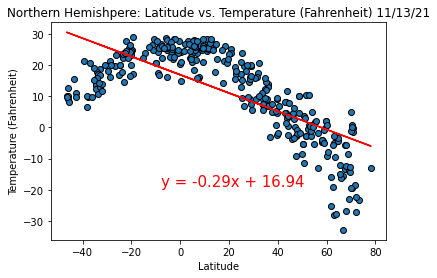

In [62]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# Labels for the values of the graph...
# seperate since we will copy and paste for Southern also
x_values = northern_data['latitude']
y_values = northern_data['temp']
x_label = 'Latitude'
y_label = 'Temperature (Fahrenheit)'
blank_hemisphere = 'Northern Hemishpere'

# Code for values 
linregress_outcome = linregress(x_values, y_values)
# print(linregress_outcome)
# outcome: LinregressResult(slope=-0.2931210488228063, intercept=16.939987154977036, rvalue=-0.7253865028981034, 
# pvalue=2.6231932592028583e-55, stderr=0.015334998012898633)

# each variable equals to assigned position... slope: 0, intercept: 1 etc.
(slope, intercept, rvalue, pvalue, stderr) = linregress_outcome

# Code for the Regress Plot
regress_outcome = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plots for graph/chart
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f"{blank_hemisphere}: {x_label} vs. {y_label} {weather_Date_col}")
# plot a line graph... color red
plt.plot(x_values, regress_outcome, "r-")

# plot the line_eq into the chart
#                     (x, y) look at chart and figure out where to place it
plt.annotate(line_eq,(-8,-19),fontsize=15,color="red")

plt.xlabel(x_label)
plt.ylabel(y_label)

# print out the r-squared value
print(f"The r-squared is: {rvalue}\n")

# Save the figure
plt.savefig("../Images/North_Latitude_Vs_Temperature.png")

# Show Graph
plt.show()


The r-squared is: 0.14463967693913007



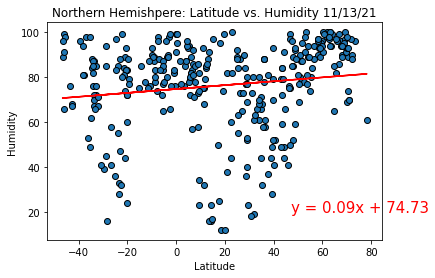

In [89]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# Labels for the values of the graph...
# seperate since we will copy and paste for Southern also
x_values = northern_data['latitude']
y_values = northern_data['humidity']
x_label = 'Latitude'
y_label = 'Humidity'
blank_hemisphere = 'Northern Hemishpere'

# Code for values 
linregress_outcome = linregress(x_values, y_values)
# print(linregress_outcome)
# outcome: LinregressResult(slope=-0.2931210488228063, intercept=16.939987154977036, rvalue=-0.7253865028981034, 
# pvalue=2.6231932592028583e-55, stderr=0.015334998012898633)

# each variable equals to assigned position... slope: 0, intercept: 1 etc.
(slope, intercept, rvalue, pvalue, stderr) = linregress_outcome

# Code for the Regress Plot
regress_outcome = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plots for graph/chart
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f"{blank_hemisphere}: {x_label} vs. {y_label} {weather_Date_col}")
# plot a line graph... color red
plt.plot(x_values, regress_outcome, "r-")

# plot the line_eq into the chart
#                     (x, y) look at chart and figure out where to place it
plt.annotate(line_eq,(47,20),fontsize=15,color="red")

plt.xlabel(x_label)
plt.ylabel(y_label)

# print out the r-squared value
print(f"The r-squared is: {rvalue}\n")

# Save the figure
plt.savefig("../Images/North_Latitude_Vs_Humidity.png")

# Show Graph
plt.show()


The r-squared is: 0.0972451333979857
The line equation is: y = 0.11x + 59.92



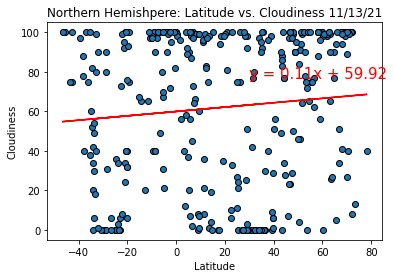

In [85]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# Labels for the values of the graph...
# seperate since we will copy and paste for Southern also
x_values = northern_data['latitude']
y_values = northern_data['cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
blank_hemisphere = 'Northern Hemishpere'

# Code for values 
linregress_outcome = linregress(x_values, y_values)
# print(linregress_outcome)
# outcome: LinregressResult(slope=-0.2931210488228063, intercept=16.939987154977036, rvalue=-0.7253865028981034, 
# pvalue=2.6231932592028583e-55, stderr=0.015334998012898633)

# each variable equals to assigned position... slope: 0, intercept: 1 etc.
(slope, intercept, rvalue, pvalue, stderr) = linregress_outcome

# Code for the Regress Plot
regress_outcome = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plots for graph/chart
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f"{blank_hemisphere}: {x_label} vs. {y_label} {weather_Date_col}")
# plot a line graph... color red
plt.plot(x_values, regress_outcome, "r-")

# plot the line_eq into the chart
#                     (x, y) look at chart and figure out where to place it
plt.annotate(line_eq,(30,77),fontsize=15,color="red")

plt.xlabel(x_label)
plt.ylabel(y_label)

# print out the r-squared value
print(f"The r-squared is: {rvalue}")
print(f"The line equation is: {line_eq}\n")

# Save the figure
plt.savefig("../Images/North_Latitude_Vs_Cloudiness.png")

# Show Graph
plt.show()


### Southern Plot Chart

The r-squared is: -0.6255618233407352



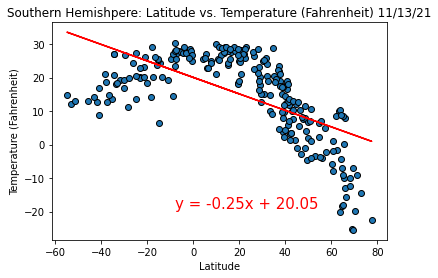

In [66]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# Labels for the values of the graph...
# seperate since we will copy and paste for Southern also
x_values = southern_data['latitude']
y_values = southern_data['temp']
x_label = 'Latitude'
y_label = 'Temperature (Fahrenheit)'
blank_hemisphere = 'Southern Hemishpere'

# Code for values 
linregress_outcome = linregress(x_values, y_values)
# print(linregress_outcome)
# outcome: LinregressResult(slope=-0.2931210488228063, intercept=16.939987154977036, rvalue=-0.7253865028981034, 
# pvalue=2.6231932592028583e-55, stderr=0.015334998012898633)

# each variable equals to assigned position... slope: 0, intercept: 1 etc.
(slope, intercept, rvalue, pvalue, stderr) = linregress_outcome

# Code for the Regress Plot
regress_outcome = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plots for graph/chart
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f"{blank_hemisphere}: {x_label} vs. {y_label} {weather_Date_col}")
# plot a line graph... color red
plt.plot(x_values, regress_outcome, "r-")

# plot the line_eq into the chart
#                     (x, y) look at chart and figure out where to place it
plt.annotate(line_eq,(-8,-19),fontsize=15,color="red")

plt.xlabel(x_label)
plt.ylabel(y_label)

# print out the r-squared value
print(f"The r-squared is: {rvalue}\n")

# Save the figure
plt.savefig("../Images/South_Latitude_Vs_Temperature.png")

# Show Graph
plt.show()


The r-squared is: 0.21115485815964474



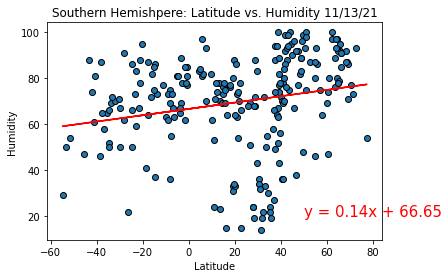

In [70]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# Labels for the values of the graph...
# seperate since we will copy and paste for Southern also
x_values = southern_data['latitude']
y_values = southern_data['humidity']
x_label = 'Latitude'
y_label = 'Humidity'
blank_hemisphere = 'Southern Hemishpere'

# Code for values 
linregress_outcome = linregress(x_values, y_values)
# print(linregress_outcome)
# outcome: LinregressResult(slope=-0.2931210488228063, intercept=16.939987154977036, rvalue=-0.7253865028981034, 
# pvalue=2.6231932592028583e-55, stderr=0.015334998012898633)

# each variable equals to assigned position... slope: 0, intercept: 1 etc.
(slope, intercept, rvalue, pvalue, stderr) = linregress_outcome

# Code for the Regress Plot
regress_outcome = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plots for graph/chart
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f"{blank_hemisphere}: {x_label} vs. {y_label} {weather_Date_col}")
# plot a line graph... color red
plt.plot(x_values, regress_outcome, "r-")

# plot the line_eq into the chart
#                     (x, y) look at chart and figure out where to place it
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

plt.xlabel(x_label)
plt.ylabel(y_label)

# print out the r-squared value
print(f"The r-squared is: {rvalue}\n")

# Save the figure
plt.savefig("../Images/South_Latitude_Vs_Humidity.png")

# Show Graph
plt.show()


The r-squared is: 0.1346727885401063



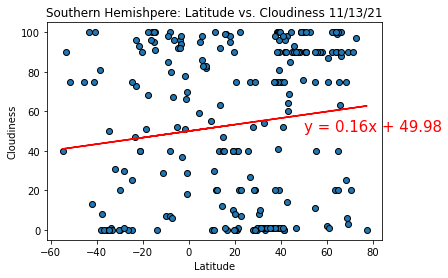

In [73]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# Labels for the values of the graph...
# seperate since we will copy and paste for Southern also
x_values = southern_data['latitude']
y_values = southern_data['cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
blank_hemisphere = 'Southern Hemishpere'

# Code for values 
linregress_outcome = linregress(x_values, y_values)
# print(linregress_outcome)
# outcome: LinregressResult(slope=-0.2931210488228063, intercept=16.939987154977036, rvalue=-0.7253865028981034, 
# pvalue=2.6231932592028583e-55, stderr=0.015334998012898633)

# each variable equals to assigned position... slope: 0, intercept: 1 etc.
(slope, intercept, rvalue, pvalue, stderr) = linregress_outcome

# Code for the Regress Plot
regress_outcome = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plots for graph/chart
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f"{blank_hemisphere}: {x_label} vs. {y_label} {weather_Date_col}")
# plot a line graph... color red
plt.plot(x_values, regress_outcome, "r-")

# plot the line_eq into the chart
#                     (x, y) look at chart and figure out where to place it
plt.annotate(line_eq,(50,50),fontsize=15,color="red")

plt.xlabel(x_label)
plt.ylabel(y_label)

# print out the r-squared value
print(f"The r-squared is: {rvalue}\n")

# Save the figure
plt.savefig("../Images/South_Latitude_Vs_Cloudiness.png")

# Show Graph
plt.show()
